In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(5)

,outlet_no,business_type,city,state,zip,store_location,avg_age,blue_collar,white_collar,female,...,total_household_income,time_zone,latitude,longitude,location_employee_code,employee_size,credit_score,credit_score_range,actual_credit_score,total_sales
0,247,1,LIMA,OH,45804,TRAVEL/TRANSPORTATION/HOSPITALITY,44.01,43.68,35.41,53.37,...,63860000,EST,40.704283,-84.147047,E,70,B,80 TO 84,80,4070
1,253,4,VACAVILLE,CA,95687,AT-WORK,38.36,41.31,26.48,54.00,...,92764000,PST,38.354860,-121.950360,D,35,A,90 TO 94,91,4323
2,265,4,CINCINNATI,OH,45219,EDUCATIONAL,28.81,17.22,43.06,45.56,...,51027000,EST,39.136100,-84.504288,C,13,A+,95 TO 100,97,2163
3,267,1,GLASGOW,KY,42141,AT-WORK,42.89,38.49,44.00,52.41,...,47119000,CST,37.010838,-85.903418,A,3,B+,85 TO 89,86,528
4,276,1,BOWLING GREEN,KY,42101,EATING & DRINKING,38.82,60.82,26.24,54.18,...,47941000,CST,36.964703,-86.436535,A,3,P,PROFESSIONAL INDIVIDUAL,78,528


In [4]:
data['credit_score_range'].unique()

array(['80 TO 84', '90 TO 94', '95 TO 100', '85 TO 89',
       'PROFESSIONAL INDIVIDUAL', '75 TO 79', 'INSTITUTION', '70 TO 74',
       'LESS THAN 70'], dtype=object)

In [5]:
city =['LIMA', 'VACAVILLE', 'CINCINNATI', 'GLASGOW', 'BOWLING GREEN',
       'LANCASTER', 'HOUSTON', 'SPRINGFIELD', 'RAPID CITY', 'FORT WORTH',
       'LAREDO', 'NEW YORK', 'CHARLESTON', 'PITTSBURGH',
       'WEST VALLEY CITY', 'CAYCE', 'HOT SPRINGS NATIO', 'CANTON',
       'FORT WAYNE', 'DU BOIS', 'DAYTON', 'MASON CITY', 'WASHINGTON',
       'LAKE OSWEGO', 'FAYETTEVILLE', 'SALT LAKE CITY', 'KNOXVILLE',
       'TURLOCK', 'MCALLEN', 'CENTERVILLE', 'ROCHESTER', 'OKLAHOMA CITY',
       'GAUTIER', 'DOYLESTOWN', 'ATLANTA', 'MEADVILLE', 'FORT MYERS',
       'ERIE', 'BEAUMONT', 'JACKSON', 'CLARKSVILLE', 'BETHLEHEM',
       'SAN ANTONIO', 'LAS VEGAS', 'ATHENS', 'SAN LUIS OBISPO', 'SEATTLE',
       'BRADENTON', 'TINLEY PARK', 'HUNTLEY', 'SYRACUSE', 'WHEELWRIGHT',
       'TOWSON', 'YONKERS', 'ARDEN HILLS', 'MARION', 'LIVONIA',
       'COLORADO SPRINGS', 'CURWENSVILLE', 'SAINT CHARLES', 'PETERSBURG',
       'SCOTTSDALE', 'SILVER SPRING', 'PORTLAND', 'BIRMINGHAM',
       'CEDARVILLE', 'CLERMONT', 'ASHEVILLE', 'SHREVEPORT', 'DRAPER',
       'WAVERLY', 'CANANDAIGUA', 'MOUNT PLEASANT', 'MARIETTA', 'MANKATO',
       'HARLINGEN', 'HATCH', 'MOBILE', 'POULSBO', 'GARDEN GROVE',
       'GIG HARBOR', 'OCONOMOWOC', 'MOUNT MORRIS', 'ORLANDO', 'DODGE CITY',
       'DILLSBURG', 'HUNTSVILLE', 'KANSAS CITY', 'JACKSONVILLE', 'DULUTH',
       'CITRUS HEIGHTS', 'ONEONTA', 'LOS LUNAS', 'GIBSONIA', 'ROBINSON',
       'VERNON HILLS', 'PHOENIX', 'DESTIN', 'SHEPHERD', 'BROOKLYN',
       'PLANO', 'WINTERS', 'JAMAICA', 'POWAY', 'LEXINGTON', 'UPLAND',
       'NEW ALBANY', 'GREENVILLE', 'JEFFERSON CITY', 'ARLINGTON',
       'BUFFALO', 'LOS ANGELES', 'CHARLOTTE', 'WEST LAFAYETTE', 'GARY',
       'COOPERSTOWN', 'GREAT BEND', 'DAVISON', 'SMYRNA', 'MISSOURI CITY',
       'MEMPHIS', 'FORT WALTON BEACH', 'KISSIMMEE', 'BATAVIA', 'OLDSMAR',
       'WYNNE', 'ASHVILLE', 'FT BRAGG', 'TROY', 'SHAKER HTS',
       'CLEVELAND HTS', 'HAMBURG','CORBIN','WILLIAMSPORT','RUSK','ALBANY','BRAWLEY','SCOTTSVILLE', 'GLENDALE', 'MADISONVILLE','JERSEY SHORE',   'FAIRMONT', 'ALICE', 'KINGSPORT', 'WASHINGTON COURT', 
       'BURIEN', 'LAKE PLACID', 
       'FLINT',  'CLEVELAND',  'TARZANA',  'ELIZABETHTON', 
       'RUSSELLVILLE',  'GRAND BLANC', 'GOLD BEACH', 'YEADON', 
       'REDFORD',  'DURANT', 'WEST LAFAYETT', 
        'SAINT PAUL', 'MORAINE','HIGHLANDS RANCH',
       'DALLAS', 'TOPTON']

In [6]:
state =['OH', 'CA', 'KY', 'TX', 'IL', 'SD', 'NY', 'SC', 'PA', 'UT', 'AR',
       'MS', 'IN', 'IA', 'OR', 'NC', 'TN', 'MN', 'OK', 'GA', 'FL', 'NV',
       'WA', 'MD', 'MI', 'CO', 'MO', 'WV', 'AZ', 'AL', 'LA', 'NM', 'WI',
       'KS', 'WY','EST', 'PST', 'CST', 'MST','E', 'D', 'C', 'A', 'B', 'G', 'H', 'F', 'I', 'J', 'K','B', 'A', 'A+', 'B+', 'P', 'C+', 'I', 'C', 'U']

In [7]:
loc =['TRAVEL/TRANSPORTATION/HOSPITALITY', 'AT-WORK', 'EDUCATIONAL',
       'EATING & DRINKING', 'THIRD PARTY (NON-CONSUMER)',
       'OTHER SHOPPING & SERVICES', 'ENTERTAINMENT/RECREATION/LEISURE',
       'GROCERY SHOPPING']

In [8]:
score =['80 TO 84', '85 TO 89','90 TO 94', '95 TO 100', '85 TO 89',
       'PROFESSIONAL INDIVIDUAL', '75 TO 79', 'INSTITUTION', '70 TO 74',
       'LESS THAN 70']

In [9]:
l = city+state+loc+score
len(l)

240

In [10]:
a = range(0,240)

In [11]:
data =data.replace(l,a)

In [12]:
x = data[['outlet_no', 'business_type', 'city', 'state', 'zip', 'store_location',
       'avg_age', 'blue_collar', 'white_collar', 'female', 'male',
       'total_household_size ', 'total_household_income', 'time_zone',
       'latitude', 'longitude', 'location_employee_code', 'employee_size',
       'credit_score', 'credit_score_range', 'actual_credit_score'
       ]]
y = data['total_sales']

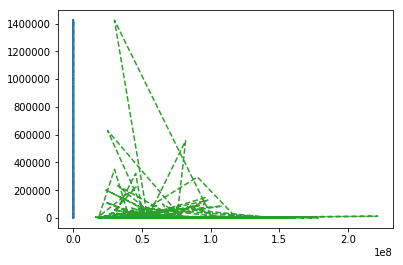

In [13]:
plt.plot(x,y,ls='--')
plt.show()

In [19]:
kn = LinearRegression()
kn.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
test =pd.read_csv('test.csv')

In [21]:
test = test.replace(l,a)

In [22]:
ytest =kn.predict(test)

In [23]:
ytest

array([  9.06467950e+03,   5.96087197e+03,   3.58917334e+03,
         4.64006306e+03,   4.47533808e+03,  -5.77808403e+03,
        -2.63722380e+03,   2.84414459e+03,   3.03441862e+03,
         3.10913512e+03,   1.26736272e+03,   1.13311264e+04,
         5.99480031e+02,   1.40318384e+04,   2.83526392e+03,
         7.27705141e+03,   8.94730649e+03,  -1.60051097e+03,
        -2.34246174e+03,   1.53889643e+04,   1.21918815e+04,
         2.64989476e+03,   1.35114129e+04,   2.47461427e+03,
         5.72939405e+03,   1.29901076e+04,   3.97670608e+03,
         1.16309557e+04,  -2.09833124e+03,   1.77204144e+03,
         7.79742981e+03,   3.34119083e+03,   9.10119038e+04,
         5.94103445e+03,   1.40188511e+04,   1.66483925e+04,
        -8.26405120e+03,   1.58658583e+04,   1.55302744e+04,
         1.95778791e+04,   6.35979560e+03,   2.23165117e+04,
         1.66513017e+03,   7.70215891e+03,   9.28917651e+03,
         2.27182416e+04,   1.50442756e+03,   4.81731927e+03,
         1.01849270e+04,